## Step:1 Import Libraries and Load Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 2: Exploratory Data Analysis (EDA)

In [29]:
# Check the basic structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [31]:
# Statistical summary
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

In [32]:
# Check class distribution
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


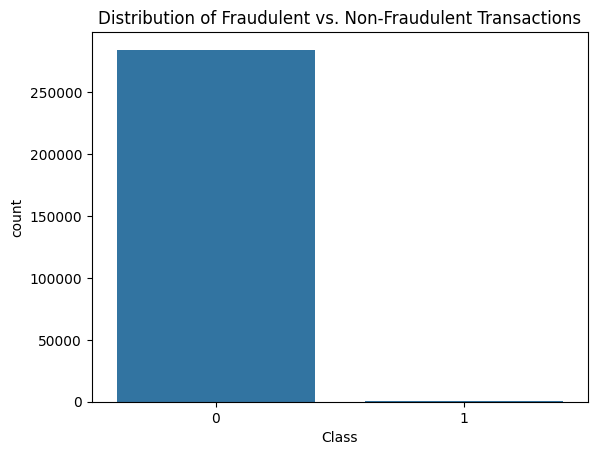

In [33]:
# Distribution of the target variable
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

## Step 3: Data Preprocessing

In [34]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data (excluding the target variable 'Class')
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled.iloc[:, :-1] = scaler.fit_transform(data_scaled.iloc[:, :-1])

# Optional: Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Step 4: Model Selection

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

## Step 5: Model Evaluation

Accuracy: 0.9495453985895925
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

ROC-AUC Score: 0.9495889209856324


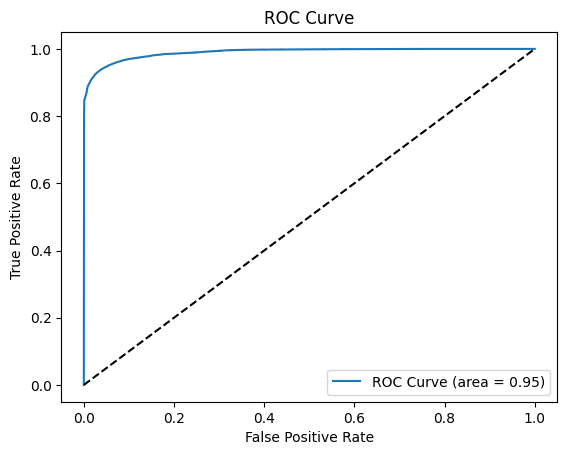

In [36]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Step 6: Hyperparameter Tuning


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## Step 7: Model Interpretation

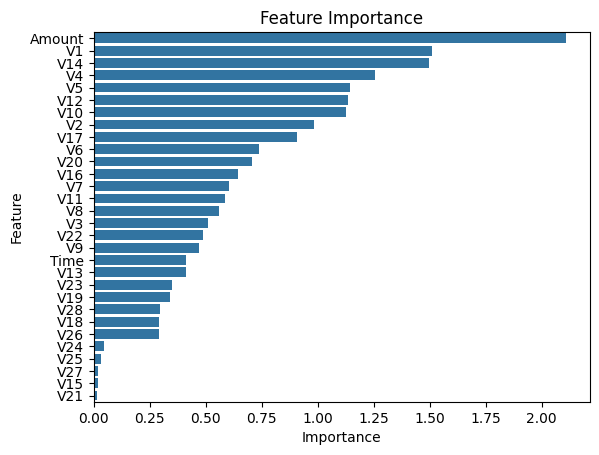

In [38]:
# Feature importance (for tree-based models like Random Forest or XGBoost)
if hasattr(best_model, 'coef_'):
    importance = np.abs(best_model.coef_[0])
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

## Step 8: Final Model and Conclusion

In [39]:
import joblib

# Save the model
joblib.dump(best_model, 'credit_fraud_model.pkl')

['credit_fraud_model.pkl']

In [40]:
# Load the saved model
loaded_model = joblib.load('credit_fraud_model.pkl')

# Test the model with new data (using X_test as an example)
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model's performance
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))
print("Classification Report:\n", classification_report(y_test, y_pred_loaded))

Accuracy of loaded model: 0.9495512606322799
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



## Step 9: Model Deployment

In [42]:
from flask import Flask, request, jsonify
app = Flask(Credit_card_fraud)

# Load the model
model = joblib.load('credit_fraud_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from the request
    data = request.json
    # Convert the data into the correct format for prediction
    features = np.array([data['features']])
    # Make a prediction
    prediction = model.predict(features)
    # Return the prediction as JSON
    return jsonify({'prediction': int(prediction[0])})

if Credit_card_fraud== '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
